# Интерполяционный кубический сплайн

### Герасимчик Анна Михайловна, 2 курс 1 группа

## 1. Постановка задачи:
Вычислить значения заданной функции *f(x)* в узлах интерполяции *xi = a + ih, i = 0, ..., n* с шагом *h = (b - a) / n*. По полученной таблице *{xi, f(xi)}* построить интерполяционный кубический сплайн *S3(x)* с дополнительными условиями:
1. S3'(a) = f'(a), S3'(b) = f'(b);
2. S3"(a) = f"(a), S3"(b) = f"(b);
3. S3"(a) = 0, S3"(b) = 0;

Убедиться, что значения функции в узлах интерполяции совпадают со значениями сплайна для всех типов дополнительных условий. В точках *xj = a + (j + 0.5)h, j = 0, ..., n - 1* вычислить значения сплайна для всех типов дополнительный условий и сравнить со значениями функции *f(x)* в этих точках, т.е. найти *max|f(xj)-S3(xj)|, j = 0, n - 1*. В одной системе координат построить график функции *f(x)* и графики кубического сплайна для трех типов дополнительных условий.

*n = 20, [a, b] = [1, 3], f(x) = cos(x^2)*

По результатам лабораторной работы оформляется отчет. Он должен содержать:

- титульный лист;  
- постановку задачи;  
- краткие теоретические сведения;  
- листинг программы с комментариями;  
- результаты;  
- выводы.

## 2. Краткие теоретические сведения
### Граничные условия 

Чтобы определить этот кубический сплайн *S(x)*, нам нужно определить *ai, bi, ci и di* для каждого:

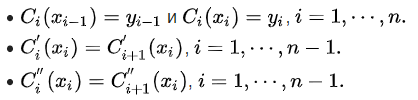


Существует 2 типа общих граничных условий:

I. Первые производные в конечных точках известны:

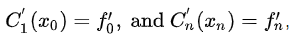

Это называется ограниченными граничными условиями.

II. Вторые производные в конечных точках известны:

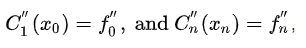

Особый случай, когда обе вторые производные равны 0, называются естественными или простыми граничными условиями.

### Метод с использованием вторых производных
Пусть
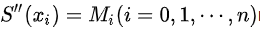



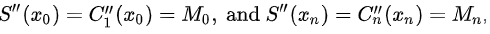

С помощью интерполяции Лагранжа, можем проинтерполировать каждый

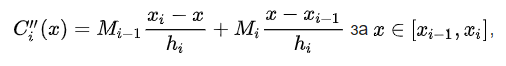

Интегрируя, получим

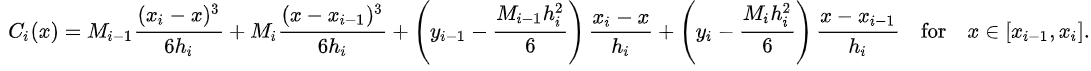

После дальнейших преобразований получим

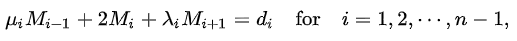

где

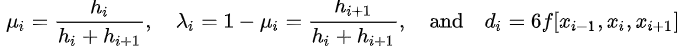

I. Для граничного условия типа I нам дают

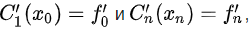

Имеем

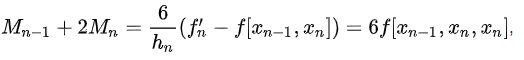

При

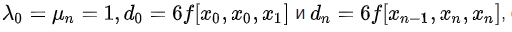

объединяем уравнения выше вместе, чтобы получить систему уравнений, которую нужно решить

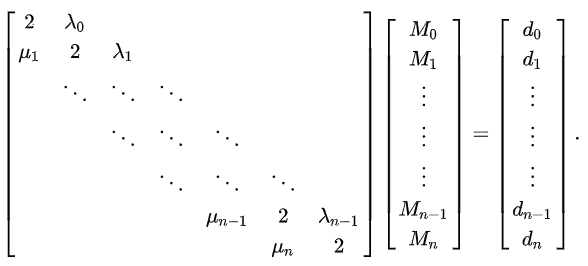


II. Для граничного условия типа II дано, что

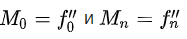

Тогда



и нам нужно решить систему уравнений в том же виде, что и выше.

In [1]:
A = 1
B = 3
n = 20

In [2]:
import math

def fx(x):
    return math.cos(x * x)

def dfx(x):
    return -2 * x * math.sin(x * x)

def ddfx(x):
    return -2 * (2 * x * x * math.cos(x * x) + math.sin(x * x))


In [3]:
import numpy as np

def getXY():
    delta_h = (B - A) / n
    x = np.arange(A, B + delta_h, delta_h)
    y = np.zeros(n + 1)

    for i in range(n + 1):
        y[i] = fx(x[i])
    return x, y

In [4]:
def dividedDifference2(x0, y0, x1, y1):
    return (y1 - y0) / (x1 - x0)

def divideDifference3(x0, y0, x1, y1, x2, y2):
    result = dividedDifference2(x1, y1, x2, y2) - dividedDifference2(x0, y0, x1, y1)
    result /= (x2 - x0)
    return result

In [5]:
def countMatCoeffs(x, y, spline_type):
    n = len(x) - 1
    h = np.zeros(n)
    for i in range(n):
        h[i] = x[i + 1] - x[i]

    c = np.zeros(n - 1)
    for i in range(n - 1):
        c[i] = h[i] / (h[i] + h[i + 1])

    e = np.zeros(n - 1)
    for i in range(n - 1):
        e[i] = h[i + 1] / (h[i] + h[i + 1])

    d = np.zeros(n + 1)
    for i in range(n - 2):
        d[i + 1] = 6 * divideDifference3(x[i], y[i], x[i + 1], y[i + 1], x[i + 2], y[i + 2])
    if (spline_type == 1):
        d[0] = 6 * (dividedDifference2(x[1], y[1], x[0], y[0]) - dfx(x[0])) / (x[1] - x[0])
        d[n] = 6 * (dfx(x[n]) - dividedDifference2(x[n - 1], y[n - 1], x[n], y[n])) / (x[n] - x[n - 1])
    elif (spline_type == 2):
        d[0] = 2 * ddfx(x[0])
        d[n] = 2 * ddfx(x[n])
    else:
        d[0] = 0
        d[n] = 0
    return h, c, e, d

In [6]:
def getMat(c, e, spline_type):
    n = len(c) + 1
    mat = np.zeros((n + 1, n + 1))
    for i in range(n - 1):
        mat[i + 1][i] = c[i]
        mat[i + 1][i + 1] = 2
        mat[i + 1][i + 2] = e[i]

    mat[0][0] = 2.
    mat[n][n] = 2.
    if (spline_type == 1):
        mat[0][1] = 1.
        mat[n][n - 1] = 1.
    return mat

In [7]:
def getM(mat, d):
    M = np.linalg.solve(mat, d)
    return M

In [8]:
def countSplineCoeffs(x, y, h, M):
    n = len(x) - 1
    b = np.zeros(n)
    for i in range(n):
        b[i] = (y[i + 1] - y[i]) / h[i] + (2 * M[i + 1] + M[i]) * h[i] / 6.

    t = np.zeros(n)
    for i in range(n):
        t[i] = (M[i + 1] - M[i]) / h[i]
    return b, t

In [9]:
def calculateUsingSpline(value, x, y, h, b, t, M):     
    j = 0
    for i in range(n):
        if (value >= x[i] and value <= x[i + 1]):
            j = i
            break

    result = y[j + 1]
    result += (b[j] * (value - x[j + 1]))
    result += (M[j + 1] * (value - x[j + 1]) ** 2 / 2.)
    result += (t[j] * (value - x[j + 1]) ** 3 / 6.)

    result = M[j] * (x[j + 1] - value) ** 3 / (6. * h[j])
    result += M[j + 1] * (value - x[j]) ** 3 / (6. * h[j])
    result += (y[j] - M[j] * h[j] ** 2 / 6.) * (x[j + 1] - value) / h[j]
    result += (y[j + 1] - M[j + 1] * h[j] ** 2 / 6.) * (value - x[j]) / h[j]
        
    return result

In [10]:
def checkCorrectness(spline_type):  
    print("Spline Type = ", spline_type)
    x, y = getXY()
    h, c, e, d = countMatCoeffs(x, y, spline_type)
    mat = getMat(c, e, spline_type)
    M = getM(mat, d)
    b, t = countSplineCoeffs(x, y, h, M)
    
    delta_h = 0.01
    s = np.zeros(n + 1)
    for i in range(n + 1):
        s[i] = calculateUsingSpline(x[i], x, y, h, b, t, M)
        print(math.fabs(s[i] - y[i]))

In [11]:
checkCorrectness(1)
checkCorrectness(2)
checkCorrectness(3)

Spline Type =  1
0.0
5.551115123125783e-17
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.1102230246251565e-16
1.1102230246251565e-16
1.1102230246251565e-16
0.0
0.0
0.0
1.1102230246251565e-16
Spline Type =  2
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.1102230246251565e-16
0.0
0.0
1.734723475976807e-18
0.0
0.0
Spline Type =  3
0.0
0.0
0.0
0.0
0.0
1.1102230246251565e-16
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.1102230246251565e-16
0.0
0.0
0.0
1.1102230246251565e-16


In [12]:
def checkError(spline_type):
    print("Spline Type = ", spline_type)
    
    x, y = getXY()        
    h, c, e, d = countMatCoeffs(x, y, spline_type)
    mat = getMat(c, e, spline_type)
    M = getM(mat, d)
    b, t = countSplineCoeffs(x, y, h, M)
     
    delta_h = 0.1
    x_s = np.arange(A + 0.5 * delta_h, B, delta_h)
    s = np.zeros(n)
    maxError = math.fabs(calculateUsingSpline(x_s[0], x, y, h, b, t, M) - fx(x_s[0]))
    for i in range(n):
        s[i] = calculateUsingSpline(x_s[i], x, y, h, b, t, M)
        curError = math.fabs(s[i] - fx(x_s[i]))
        if (maxError < curError):
            maxError = curError 

    print(maxError)

In [13]:
checkError(1)
checkError(2)
checkError(3)

Spline Type =  1
0.013400544346150345
Spline Type =  2
0.016467712093748088
Spline Type =  3
0.031097954496654645


In [14]:
import matplotlib.pyplot as plt

def solution(spline_type):   
    print("Spline Type = ", spline_type)
    
    x, y = getXY()
    h, c, e, d = countMatCoeffs(x, y, spline_type)
    mat = getMat(c, e, spline_type)
    M = getM(mat, d)
    b, t = countSplineCoeffs(x, y, h, M)
    
    delta_h = 0.01
    x_s = np.arange(A, B + delta_h, delta_h)
    k = len(x_s)
    s = np.zeros(k)
    for i in range(k):
        s[i] = calculateUsingSpline(x_s[i], x, y, h, b, t, M)    
    
    fig = plt.figure(figsize=[10.67, 8])
    ax = fig.add_subplot()
    ax.plot(x_s, s, c = "deepskyblue")
    ax.plot(x, y, color = "red")
    plt.grid(True)
    plt.xlabel(u'Аргумент')
    plt.ylabel(u'Функция')
    plt.show()

Spline Type =  1


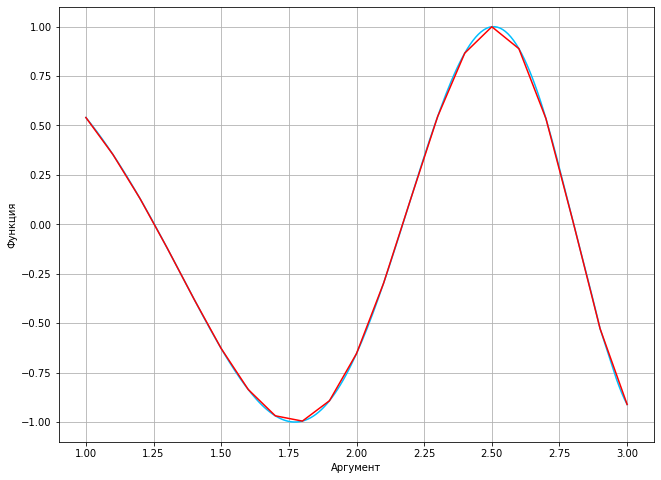

Spline Type =  2


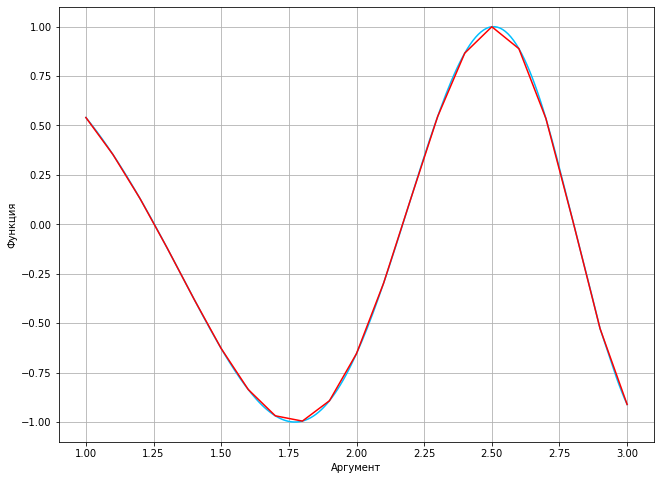

Spline Type =  3


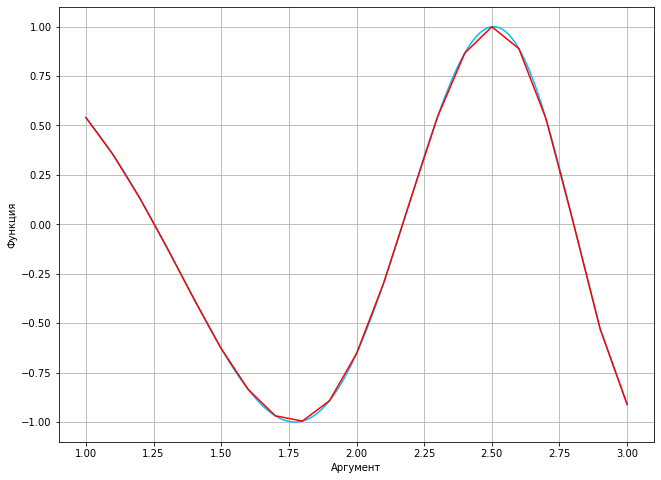

In [15]:
solution(1)
solution(2)
solution(3)

## 5. Вывод
Таким образом, апроксимационные свойства интерполяционного сплайна зависят от гладкости функции *f(x)* - чем выше гладкость интерполируемой функции, тем выше порядок апроксимации. Также алгоритм интерполяции кубическими сплайнами отличается хорошей сложностью (O(n)) и, соответственно, высокой скоростью обработки данных.